# GUIA 4

## Ejercicio 3

Pruebe varios valores de k (por ejemplo entre 2 y 10) para el conjunto de datos Iris, calcule para cada k una métrica de clustering (con sklearn) y encuentre el k óptimo para k-medias

### Métricas:
* Matriz de contingencia: Comparación de predicción vs clases reales
* Rand Index: Evalúa la similitud entre clusters. RI=1 indica 100% de coincidencia, RI=0 indica nula coincidencia
* F1 score: Mide la presición y sensibilidad del modelo. F1=1 -> 100% de aciertos, F1=0 -> 0% de aciertos
* Elbow: Técnica visual para determinar el k óptimo (donde agregar más clusters no reduce significativamente el error cuadrático)




Matriz de contingencia k=2:
 [[ 0 50  0]
 [47  3  0]
 [50  0  0]]
Adjusted Rand Index k=2: 0.5399218294207123
F1 Score k=2: 0.01941747572815534
Elbow Score (Inertia) k=2: 152.3479517603579

Matriz de contingencia k=3:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
Adjusted Rand Index k=3: 0.7163421126838476
F1 Score k=3: 0.08408408408408408
Elbow Score (Inertia) k=3: 78.8556658259773

Matriz de contingencia k=4:
 [[ 0 50  0  0]
 [23  0 27  0]
 [26  0  1 23]
 [ 0  0  0  0]]
Adjusted Rand Index k=4: 0.5983278434991391
F1 Score k=4: 0.00641025641025641
Elbow Score (Inertia) k=4: 57.35088021295475

Matriz de contingencia k=5:
 [[ 0 50  0  0  0]
 [23  0 27  0  0]
 [13  0  1 12 24]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
Adjusted Rand Index k=5: 0.6154838709677419
F1 Score k=5: 0.005128205128205128
Elbow Score (Inertia) k=5: 46.472230158730156

Matriz de contingencia k=6:
 [[ 0 28  0  0  0 22]
 [23  0 27  0  0  0]
 [13  0  1 12 24  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]
Adju

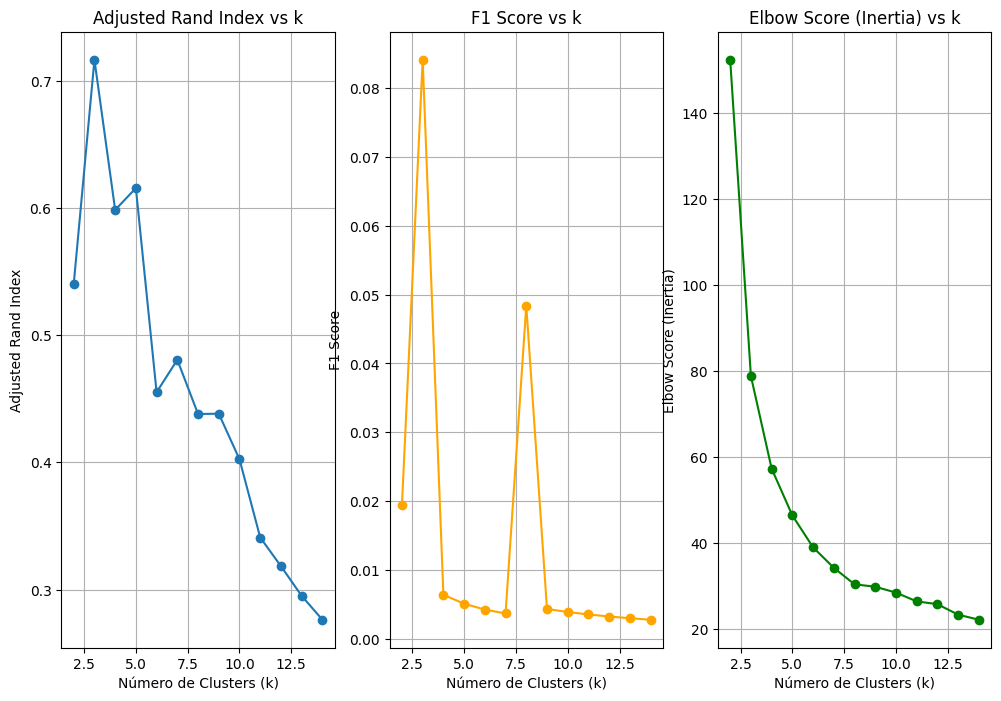

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, f1_score

#cargar dataset
data = load_iris()  
x = data.data
y = data.target

#rango de k a evaluar
k_values = range(2, 15)

#listas para almacenar métricas
confusion_matrixs = []
ari_scores = []
f1_scores = []
elbow_scores = []

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x)

    cm = confusion_matrix(y, y_pred)
    print(f"\nMatriz de contingencia k={k}:\n", cm)
    confusion_matrixs.append(cm)

    ari = adjusted_rand_score(y, y_pred)
    ari_scores.append(ari)
    print(f"Adjusted Rand Index k={k}: {ari}")  

    f1 = f1_score(y, y_pred, average='macro')
    f1_scores.append(f1)
    print(f"F1 Score k={k}: {f1}")  

    elbow_scores.append(kmeans.inertia_)
    print(f"Elbow Score (Inertia) k={k}: {kmeans.inertia_}")


#graficar métricas para cada k
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.plot(k_values, ari_scores, marker='o')
plt.title('Adjusted Rand Index vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Adjusted Rand Index')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(k_values, f1_scores, marker='o', color='orange')
plt.title('F1 Score vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('F1 Score')
plt.grid()  

plt.subplot(1, 3, 3)
plt.plot(k_values, elbow_scores, marker='o', color='green')
plt.title('Elbow Score (Inertia) vs k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Elbow Score (Inertia)')
plt.grid()  

    
